# Topik
Classification

## Pengenalan

Film Titanic merupakan sebuah film bergenre roman dan bencana di Amerika Serikat yang diproduksi tahun 1997. Film ini masih cukup populer hingga saat ini. Karena kepopulerannya tersebut, saya jadi penasaran dan ingin mengetahui lebih lanjut tentang tragedi tersebut. Oleh sebab itu saya ingin menganalisis tragedi tersebut dengan data berjumlah 2 data, bernama train.csv dan test.csv yang tersedia pada Kaggle yang berisi informasi tentang 
'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'. Tujuan dilakukannya analisis pada data tersebut yaitu untuk mengetahui klasifikasi penumpang yang selamat dan tidak selamat berdasarkan parameter yang ada pada data tersebut.

## Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
import pickle 
import pandas_profiling
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#ML Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
#from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


## Data Loading & Exploratory Data Analysis

In [2]:
# Data Loading
train_df = pd.read_csv('Titanic/train.csv')
test_df = pd.read_csv('Titanic/test.csv')

#train_df['train_test'] = 1 #Model 1 for Yes
#test_df['train_test'] = 0 # Model for non
#test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
report = train_df.profile_report(title='Titanic - Report',
                            progress_bar=False)
report

In [5]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

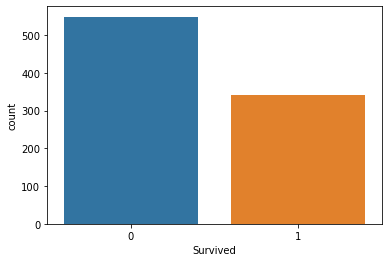

In [6]:
sns.countplot(data=train_df, x='Survived')

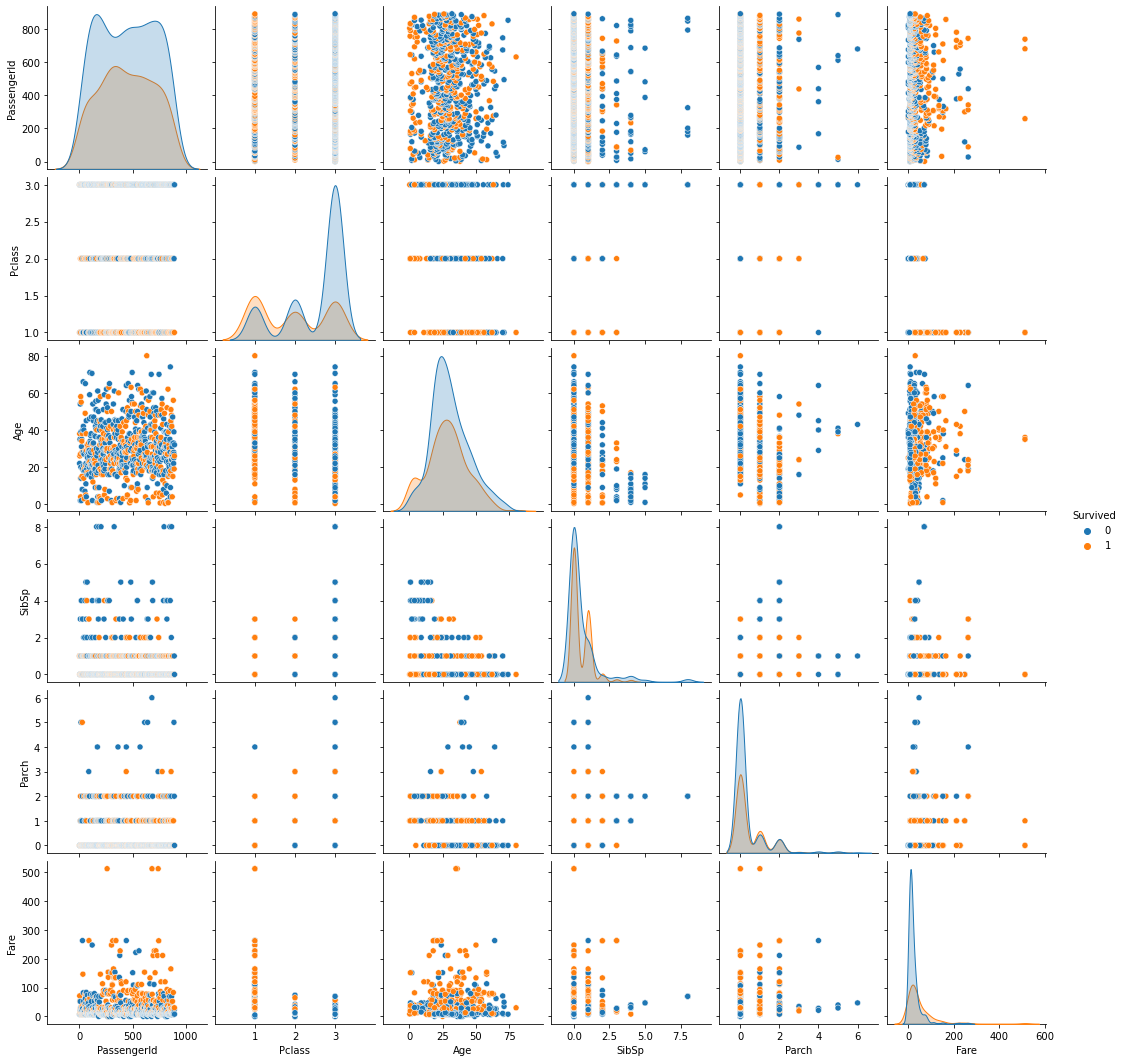

In [7]:
sns.pairplot(train_df, hue='Survived')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Exploratory Data Analysis

1) Data Numerik 
* Age
* SibSp 
* Parch 
* Fare

2) Data Kategorik
* Survived 
* Pclass
* Sex 
* Ticket 
* Cabin 
* Embarked

In [9]:
df_numerical  = train_df[['Age','SibSp','Parch','Fare']] 
df_categorical = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']] 

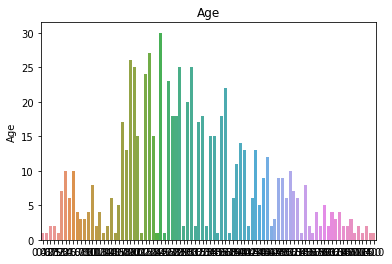

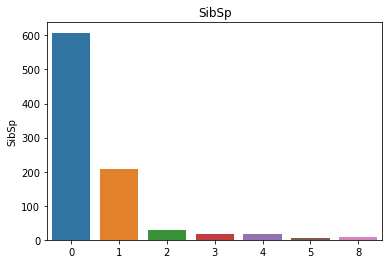

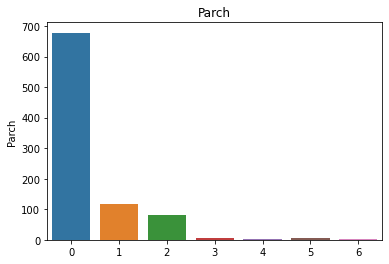

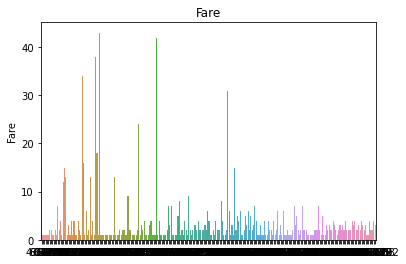

In [10]:
# Distribusi data numerik
for i in df_numerical.columns:
    sns.barplot(df_numerical[i].value_counts().index,df_numerical[i].value_counts()).set_title(i)
    plt.show()

Dari histogram di atas diketahui bahwa data numerik belum berdistribusi normal.

In [11]:
# melihat perbandingan orang yang survive dan tidak survive dengan variabel Age, Parch, SibSp, & Fare.
pd.pivot_table(train_df, index = "Survived", values = ['Age','Parch','SibSp','Fare', ])

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

Dari hasil pivot di atas diketahui:
1) Rata-rata umur orang-orang yang selamat adalah 28 tahun. Berdasarkan hasil distribusi variabel usia. 

2) Orang-orang yang membayar ongkos lebih mahal, mereka memiliki peluang lebih besar untuk selamat. 

3) Orang tua yang memiliki anak memiliki peluang selamat yang lebih kecil, karena mereka memprioritaskan keselamatan anaknya.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

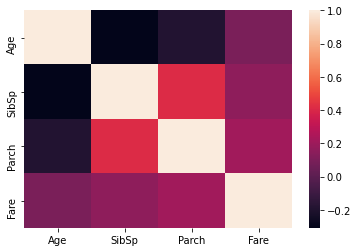

In [12]:
# melihat korelasi untuk setiap variabel numerik
print(df_numerical.corr())
sns.heatmap(df_numerical.corr())

Dari grafik di atas diketahui:
1. SibSp dan Parch memiliki korelasi yang paling tinggi.
2. Age dan SibSp memiliki korelasi yang negatif.

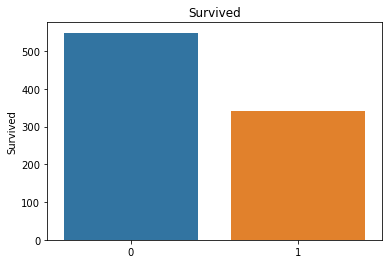

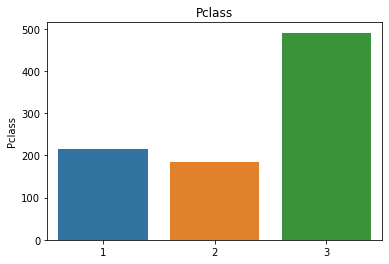

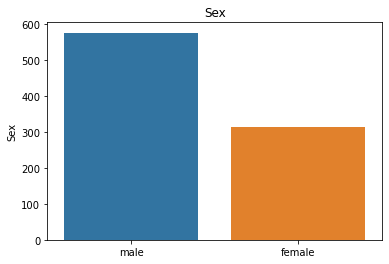

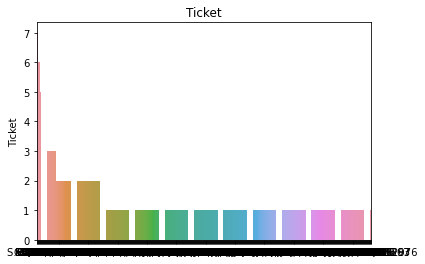

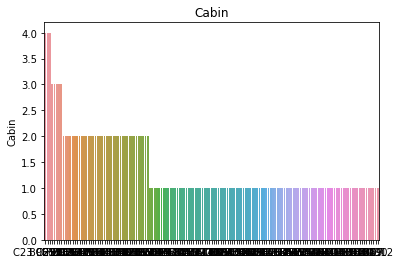

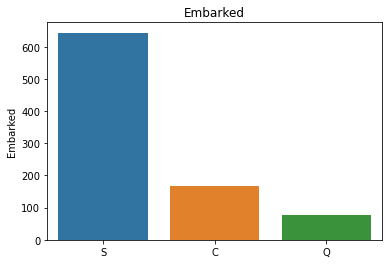

In [13]:
# Distribusi data kategorik
for i in df_categorical.columns:
    sns.barplot(df_categorical[i].value_counts().index,df_categorical[i].value_counts()).set_title(i)
    plt.show()

In [14]:
# melihat perbandingan orang yang survive berdasarkan variabel Pclass
pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

In [15]:
# melihat perbandingan orang yang survive berdasarkan variabel Sex
pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count')

Sex       female  male
Survived              
0             81   468
1            233   109

In [16]:
# melihat perbandingan orang yang survive berdasarkan variabel Emabrked
pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Dari hasil pivot di atas diketahui: 
1. Pclass = 1 lebih banyak orang yang selamat, tetapi Pclass = 2, 3, lebih sedikit yang selamat.
2. Lebih banyak female yang selamat dibandingkan dengan male. 
3. Embarked S merupakan yang paling banyak survive dibandingkan embarked C dan Q.

          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000


<AxesSubplot:>

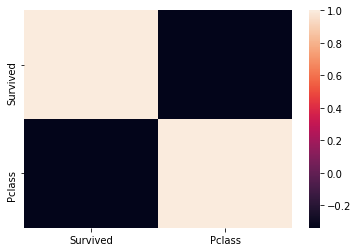

In [17]:
# melihat korelasi untuk setiap variabel kategorik
print(df_categorical.corr())
sns.heatmap(df_categorical.corr())

Dari heatmap di atas diketahui: 
Pclass memiliki korelasi negatif dengan survived.

## Data Preprocessing

In [18]:
# memeriksa missing values

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Terlihat bahwa terdapat missing value pada variabel Sex = 177, Cabin = 687, dan Embarked = 2. 

In [19]:
# merubah missing values dengan nilai mean
train_df["Age"].fillna(train_df["Age"].mean(), inplace = True)


In [20]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train_df['Sex']=train_df['Sex'].replace('male', 0)
train_df['Sex']=train_df['Sex'].replace('female', 1)
train_df.drop(['Name', 'PassengerId', 'Fare', 'Ticket', 'Embarked', 'Cabin'], axis = 1, inplace = True)
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [22]:
missing = train_df.isnull().sum().sort_values(ascending=False)
missing = missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

## Pendefinisian Model 

In [23]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['Survived']

label_encoder = LabelEncoder()
for col in object_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])
train_df.head()
#scaled_X_train= scaler.transform(X_train)
#scaled_X_test= scaler.transform(X_test)

Survived  Pclass  Sex   Age  SibSp  Parch
0         0       3    0  22.0      1      0
1         1       1    1  38.0      1      0
2         1       3    1  26.0      0      0
3         1       1    1  35.0      1      0
4         0       3    0  35.0      0      0

In [24]:
X = train_df[['Pclass', 'Sex', 'Age', 'Parch']]
y = train_df['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
#from sklearn.preprocessing import StandardScaler

#scaler= StandardScaler()
#scaler.fit(X_train)

## Pelatihan Model 

In [27]:
# Using Decision Tree

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [28]:
# Using Random Forest 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [29]:
# Using Logistic Regression
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Dari hasil prediksi model di atas, diketahui bahwa model Logistic Regression memiliki _Accuracy Score_ terbesar dibanding 2 model lainnya.

## Evaluasi Model 

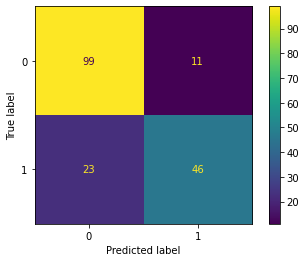

In [30]:
plot_confusion_matrix(dtree, X_test, y_test)

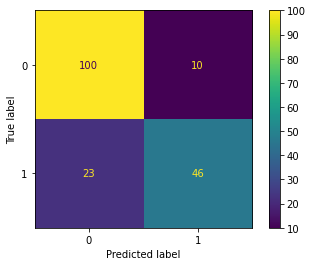

In [31]:
plot_confusion_matrix(random_forest, X_test, y_test)

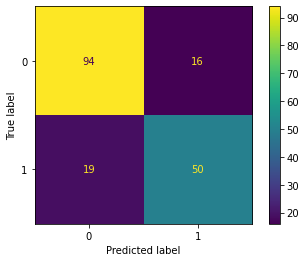

In [32]:
plot_confusion_matrix(LogR, X_test, y_test)

## Kesimpulan

Dari semua parameter, yang memiliki korelasi terbesar yaitu SibSp dan Parch. 
Kemudian diantara ketiga model, yang memiliki nilai akurasi terbesar dan memiliki True Label dan Predict Label terbesar adalah Logistic Regression. 
Dengan demikian Logistic Regression adalah model terbaik.